# XGBoost 소개
- 이 장에서 익스트림 그레이디언트 부스팅 또는 XGboost를 알아보겠다.
- 결정 트리에서 그레이디언트 부스팅까지 다루면서 구축한 머신러닝 개념의 범위 안에서 XGBoost를 소개한다.
- 이 장의 처음 절반은 XGBoost가 트리 앙상블 알고리즘을 향상시킨 이론에 초점을 맞춘다.
- 나머지 절반은 XGBoost를 세상에 알리게 된 힉스 보손 캐글 대회를 위한 XGBoost모델을 만들어보겠다.
---
- XGBoost의 속도 향상, 누락된 값 처리 방법, 규제 매개변수의 수학 이론에 대해 알아보겠다.
- XGBoost 분류 모델과 회귀 모델을 단계적으로 만들어 본다.
- 마지막으로 강입자충돌기에서 발견된 힉스 보손을 찾기 위해 원본 XGBoost 파이썬 API로 데이터에 가중치를 부여하고 예측을 만들어보겠다.
---
이 장의 구성은 다음과 같다.

- XGBoost 구조
- XGBoost 매개변수 분석
- XGBoost 모델 만들기
- 힉스 보손 찾기 - 사례 연구 

## 5.1 XGBoost 구조
- XGBoost는 그레이디언트 부스팅을 크게 업그레이드한 모델이다.
- 이 절에서 그레이디언트 부스팅이나 다른 앙상블 알고리즘과 구별되는 XGBoost의 주요 기능을 알아보겠다.

# 5.1.1 역사
- 빅 데이터 관리가 가속화되면서 정확하고 최적의 예측을 만드는 최고의 머신러닝 알고리즘을 찾는 일이 시작되었다.
- **결정 트리는 너무 정확해서 새로운 데이터에 잘 일반화되지 못하는 머신러닝 모델을 만든다.**
- 앙상블 방법은 배깅과 부스팅을 통해 많은 결정 트리를 연결하기 때문에 더 효과적이라고 입증되었다.
- 트리 앙상블 중에서 선두에 있는 알고리즘은 그레이디언트 부스팅이다.
---
- 워싱톤 대학교의 티엔치 첸은 그레이디언트 부스팅의 일관성, 성능, 뛰어난 결과를 더 향상시켰다. 새로운 이 알고리즘의 이름을 익스트림 그레이디언트 부스팅의 줄임말인 XGBoost라고 불렀다. 첸의 그레이디언트 부스팅 방식에는 내장된 규제와 속도 향상이 포함되어 있다.

---
2016년 캐글 대회에서 성공을 거둔 후 티엔치 첸과 카를로스 게스트린은 [XGBoost: A SCalable Tree Boosting System]논문으로 머신러닝 커뮤니티에 이 알고리즘을 소개했다. 이어지는 절에서 핵심적인 내용을 요약했다.

## 5.1.2 주요 기능
- 4장에서 언급했듯이 빅 데이터를 다룰 때 빠른 알고리즘의 필요성이 확실히 드러난다. 익스트림 그레이디언트 부스팅의 익스트림은 계산 능력을 극대화한다는 의미다. 이렇게 하면 모델 구축뿐만 아니라 디스크 입출력, 압축, 캐싱, CPU에 대한 지식이 필요하다.
---
- 이 책의 초점은 XGBoost 모델을 만드는 것이지만 XGBoost를 더 빠르고, 정확하고 멋지게 만드는 주요 발전을 알아보기 위해 XGBoost의 내부를 살짝 들여다 보겠다. 그럼 주요 발전 사항을 알아보겠다.
---
## 누락된 값 처리
- 1장에서  누락된 값을 처리하는 다양한 방법을 익히는 데 많은 시간을 들였다. 모든 머신러닝 기술자에게 필수적인 기술이다.
- 하지만 XGBoost는 자체적으로 누락된 값을 처리할 수 있다. missing 매개변수에 어떤 값을 지정할 수 있다.
- 누락된 값이 있을 때 XGBoost는 가능한 노드 분할마다 점수를 매겨 최상의 결과를 내는 분할을 선택한다.
---
## 속도 향상
- XGBoost는 특히 속도에 주안점을 두어 설계되었다.
- 속도가 향상되면 더 빨리 머신러닝 모델을 만들 수 있고 특히 수백만, 수십억, 수조 개의 행을 가진 데이터를 처리할 때 중요하다. 이런 경우는 빅 데이터 분야에서 흔하다. 산업계와 학계는 과거 어느때보다 더 많은 데이터를 매일 쌓고 있다. 다음과 같은 새로운 기능 덕분에 XGBoost는 다른 앙상블 알고리즘에 비해 속도에서 큰 장점을 가진다.
---
#### 새로운기능
- 근사 분할 탐색 알고리즘
- 희소성 고려 분할 탐색
- 병렬 컴퓨팅
- 캐시 고려 접근
- 블록 압축과 샤딩 

### 속도 향상-근사 분할 탐색 알고리즘
- 결정 트리는 최적의 결과를 달성하기 위해 최적의 분할을 찾아야 한다.
- 그리디 알고리즘은 매 단계에서 최상의 분할을 선택하고 이전 노드를 돌아보지 않는다.
- 결정트리의 분할은 일반적으로 **그리디 알고리즘**으로 수행된다.

---
- XGBoost는 그리디 알고리즘 외에 새로운 **근사 분할 탐색 알고리즘**을 제공한다. 
- 분할 탐색 알고리즘은 **데이터를 나누는 퍼센트인 분위수를 사용하여 후보 분할을 제안한다.**
- **전역 제안(global proposal)에서는 동일한 분위수가 전체 훈련에 사용된다. 지역제안(local proposal)에서는 각 분할마다 새로운 분위수를 제안한다.

---
- 콴타일 스케치 알고리즘은 가중치가 균일한 데이터셋에서 잘 동작한다.
- XGBoost는 이론적으로 보장된 병합과 가지치기를 기반으로 한 새로운 가중 콴타일 스케치를 사용한다.
- 이 알고리즘의 자세한 수학 이론은 이 책의 범위를 넘어선다. 
---
### 속도 향상-희소성 고려 분할 탐색 
- 희소한 데이터는 대부분의 원소가 0이거나 null인 데이터다. 
- 데이터셋이 주로 누락된 값으로 구성되거나 원-핫 인코딩되어 있는 경우다. 
- 1장에서 pd.get_dummies()함수로 범주형 특성을 수치형 특성으로 바꾸었다.
- 이는 대부분 0으로 채워진 대용량 데이터셋을 만든다.
- 범주형 특성을 수치형 특성을 바꾸어 해당 범주는 1이고 그 외에는 0으로채우는 이 방법을 일반적으로 원-핫 인코딩이라고 부른다. 10장에서 원-핫 인코딩에 대해 실습해보겠다. 

---
- **희소 행렬**은 0이 아니거나 널이 아닌 데이터 포인트만 저장하여 공간을 절약한다.
- 희소성 고려 분할은 분할을 탐색할 때 희소한 행렬에서 XGBoost가 더 빠르다는 것을 의미한다.
- 원본 논문에 따르면 희소성 고려 분할 탐색 알고리즘은 Allstate-10k 데이터셋에서 일반적인 방법보다 50배 빠르다.

### 속도 향상- 병렬 컴퓨팅
- 부스팅은 각 트리가 이전 트리의 결과에 의존하기 때문에 병렬 컴퓨팅에 이상적이지 않다. 하지만 병렬화가 가능한 요소가 있다.
- 병렬 컴퓨팅은 여러 개의 계산 유닛이 동시에 동일한 문제에 대해 작업하는 것이다.
- XGBoost는 데이터를 블록이란 단위로 정렬하고 압축한다.
- 이런 블록은 여러 대의 머신이나 외부 메모리에 분산될 수 있다.
---
- 블록을 사용하면 데이터를 더 빠르게 정렬할 수 있다. 분할 탐색 알고리즘은 블록의 장점을 사용해 분위수 탐색을 빠르게 수행한다. 이런 요소에 XGBoost는 병렬 컴퓨팅을 적용하여 모델 구축 과정의 속도를 높인다.

### 속도 향상 - 캐시 고려 접근
- 컴퓨터의 데이터는 캐시와 메인 메모리에 나뉘어져 있다.
- 가장 빈번하게 사용하는 캐시는 고속 메모리를 사용한다.
- 자주 사용하지 않는 데이터는 저속 메모리에 저장된다.
- 캐시 수준에 따라 지연 속도의 단위가 달라진다.
---
- 그레이디언트 통계의 경우 XGBoost는 캐시를 고려한 프리페칭을 사용한다.
- XGBoost는 내부 버퍼를 할당하고 그레이디언트 통계를 가져와 미니배치 방식으로 누적을 수행한다.
- 논문에 따르면 프리페칭은 읽기/쓰기 의존성을 느슨하게 만들고 많은 샘플을 가진 데이터셋에서 실행 부하를 약 50% 절감한다.

>그레이디언트 통계는 이러한 그레이디언트 부스팅 알고리즘에서 중요한 역할을 수행합니다.
그레이디언트 통계는 주어진 데이터셋에 대해 그레이디언트(기울기) 값을 계산하는 작업을 의미합니다. 
이 그레이디언트 값은 트리 알고리즘의 학습에 사용되며, 
데이터의 특성에 따라 해당 값을 계산하는데 상당한 시간과 계산 자원이 필요합니다. 
이제 프리페칭(Pre-fetching)에 대해 설명드리겠습니다. 
프리페칭은 컴퓨터의 캐시 메모리를 효율적으로 활용하기 위해 미리 필요한 데이터를 미리 읽어오는 기술입니다. 
XGBoost에서도 그레이디언트 통계를 계산할 때, 프리페칭을 사용하여 캐시를 고려한 미리읽기를 수행합니다. 
XGBoost는 내부 버퍼를 할당하고, 그레이디언트 통계를 가져와 미니배치(mini-batch) 방식으로 누적(accumulate)을 수행합니다. 
미니배치 방식은 모든 데이터를 한 번에 처리하는 것이 아니라 일부 데이터만 선택하여 작은 미니배치로 나누어 처리하는 방법입니다. 
이렇게 함으로써 학습에 필요한 계산량을 줄이고, 메모리 사용량을 최적화할 수 있습니다. 그리고 논문에 따르면 이러한 프리페칭 기법은 읽기/쓰기 의존성을 느슨하게 만들고, 많은 샘플을 가진 데이터셋에서 실행 부하를 약 50% 정도 절감할 수 있다고 합니다. 따라서 XGBoost의 그레이디언트 통계 계산에서 프리페칭을 적용하는 것은 학습 속도를 높이고 성능을 향상시키는 데에 도움을 주는 중요한 최적화 기법 중 하나입니다.

> 요약하면 그레이디언트 통계는 프리페칭을 사용한다. 프리페칭은 필요한 데이터를 미리 읽어오는 기술이다. **미리읽기**
내부 버퍼를 할당하고, 그레이디언트 통계를 가져와 미니배치 방식으로 누적한다.(일부 데이터만 선택하여 작은 미니배치로 나누어 처리)

### 속도 향상 - 블록 압축과 샤딩
- XGBoost 블록 압축과 블록 샤딩을 통해 추가적인 속도 향상을 제공한다.
- 블록 압축은 열을 압축하여 계산 비용이 많이 드는 디스크 읽기에 도움이 된다.
- 블록 샤딩은 번갈아 가며 여러 디스크로 샤딩하기 때문에 데이터를 읽는 시간을 줄여준다.

### 정확도 향상
- XGBoost는 자체적으로 규제를 추가하여 그레이디언트 부스팅 이상으로 정확도를 높인다.
- 규제는 분산을 줄이고 과대적합을 방지하기 위한 방법이다.
- 하이퍼파라미터 튜닝을 통해서 규제를 적용할 수 있지만 규제 알고리즘을 적용할 수 있다. 예를 들어, 릿지와 라소는 선형 회귀에 규제를 추가한 머신러닝 알고리즘이다.
---
- XGBoost는 그레이디언트 부스팅과 랜덤 포레스트와 달리 학습하려는 목적 함수의 일부로 규제를 포함하고 있다. 
- 규제 매개변수는 복잡도를 제어하고 최종 가중치를 완화시켜 과대적합을 막는다. 
- **즉 XGBoost는 그레이디언트 부스팅의 규제 버전이다.**
---
- 손실 함수와 규제를 연결한 XGBoost의 목적 함수의 밑바탕이 되는 수학을 알아보겠다.
- XGBoost를 실제 사용하기 위해 수학을 알 필요는 없지만 수학지식이 XGBoost를 이해하는 데 도움이 될 수 있다.


## 5.2 XGBoost 파라미터 최적화
- 이 절에서 XGBoost가 최상의 머신러닝 모델을 만들기 위해 사용하는 파라미터 최적화와 수학 공식을 알아보겠다.
- 2장에서 파라미터와 하이퍼파라미터의 차이에 대해 설명했다.
- 하이퍼파라미터는 모델을 훈련하기 전에 선택하지만 파라미터는 모델을 훈련하는 동안 선택된다. 다른 말로 하면 모델이 데이터에서 학습하는 대상이 파라미터다.

## 5.2.1 학습 목적
- 머신러닝 모델의 목적 함수는 모델이 얼마나 데이터에 잘 맞는지를 결정한다. 
- XGBoost의 목적 함수는 **손실함수와 규제항** 두 부분으로 구성되어 있다.
> 수학적으로 표현하면
> obj(θ) = l(θ) + Ω(θ)

- 여기에서 l(θ)가 손실함수이다. 회귀일 경우 평균 제곱 오차이고 분류일 경우 로지스틱 손실이다. 에러들임 ㅇㅇ 
- Ω(θ)는 과대적합을 방지하기 위한 페널티 항인 **규제 함수**이다. 가중치랄까
- 목적 함수에 규제 항이 추가 된 것이 대부분의 트리 앙상블과 XGBoost가 다른 점이다.
- 회귀 손실 함수가 제곱 오차일 때 이 목적 함수를 조금 더 자세히 알아보자.

#### 손실 함수
- 회귀 손실 함수인 제곱 오차를 시그마 기호로 다음과 같이 쓸 수 있다.
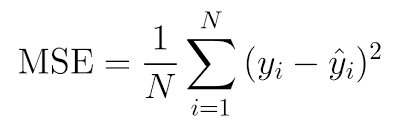
- 여기에서   y(i)는 i번째 샘플의 타깃 값이다. y ̂(i) i번째 샘플에 대해 모델이 예측한 값이다.
- 시그마 기호  Σ는 i=1부터 샘플 개수인 i = n까지 모든 샘플을 더하다는 것이다.
- 주어진 트리에서 예측 y^(i)을 만들려면 샘플을 받아 **예측을 출력하는 함수**가 필요하다. 수학적으로는 다음과 같이 표현할 수 있다.
---
Di=f(xi), f E F
- 여기에서 x(i)는 i번째 샘플의 특성으로 구성된 벡터다.
- f E F는 함수 f가 모든 가능한 CART함수인 F의 원소임을 의미한다.
- CART는 classification And Regression Trees의 약자다.
- CART는 분류 알고리즘일 때도 모든 리프 노드의 값이 실수다.

- 그레이디언트 부스팅에서 i 번째 샘플의 예측을 결정하는 함수는 4장에서 소개한 것처럼 모든 이전 함수의 합이다.






- 다음과 같이 쓸 수 있다.
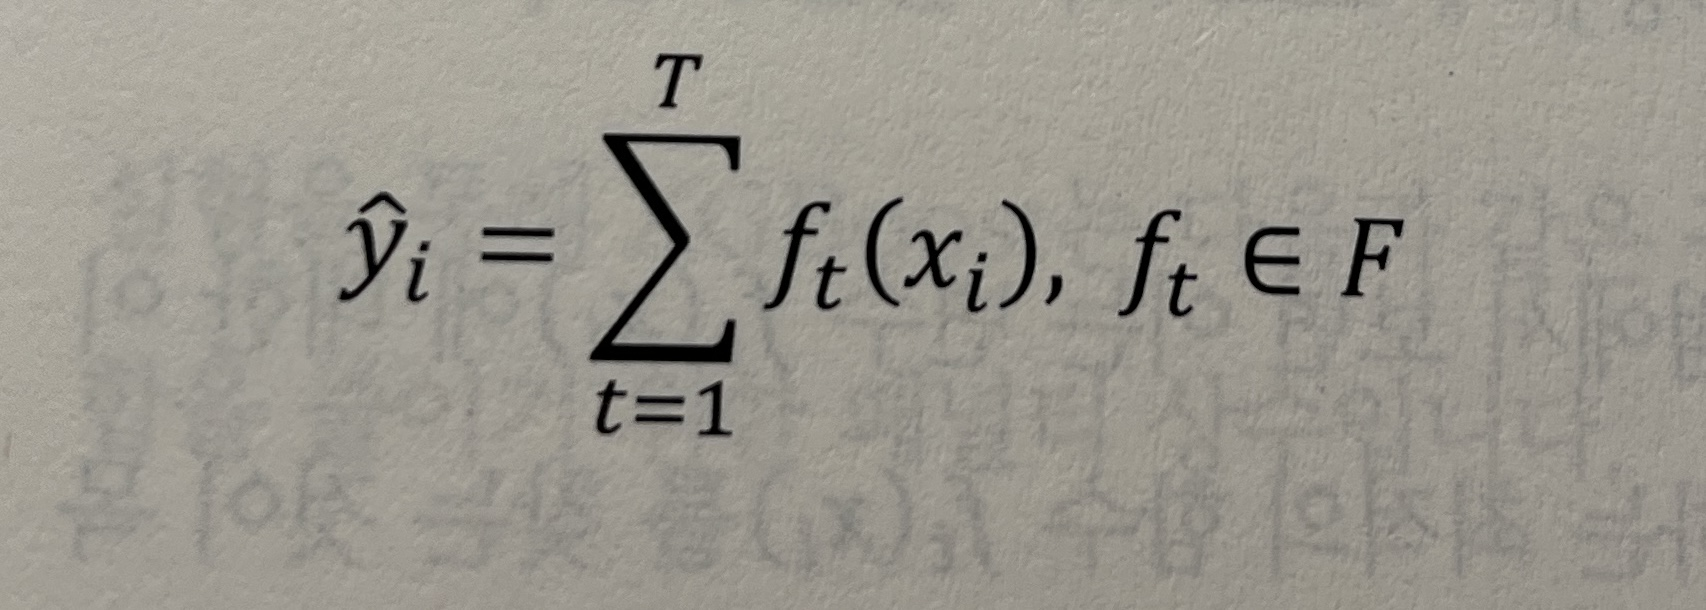

- 여기에서 T는 부스팅 트리의 개수이다. 
- 다른 말로 하면 i번째 샘플에 대한 예측을 얻기 위해 새로운 트리와 모든 이전 트리의 예측을 더한다.
- f(t) E F는 이 함수가 모든 가능한 CART 함수의 집합 F에 속한다는 것을 나타낸다.
---
- 이제 t번째 부스팅 트리의 목적 함수는 다음과 같이 쓸 수 있다.
> obj^(t) = Σl(y(i)y^(i)^t) + ΣΩ(f(t))
- 여기에서 (y(i)y^(i)^t)는 t번째 부스팅 트리의 일반적인 손실 함수이고 ΣΩ(f(t))는 규제 항이다.
- 부스팅 트리가 이전 트리의 예측과 새로운 트리의 예측을 더한다. 애드티브 학습의 기본적인 아이디어다.

- 앞의 목적 함수에 이를 대입하면 다음 식을 얻게 된다.
와... 여기서부터 벽이네 

## 5.3 XGBoost 모델 만들기
- 처음 두 절에서 파라미터 최적화, 규제, 속도 향상과 같은 XGBoost의 작동 원리를 배웠다.
- 그리고 누락된 값을 처리하기 위한 missing 매개변수 같은 새로운 기능도 알아보았다.
---
- 이 책에서는 주로 사이킷런 API로 XGBoost 모델을 만든다. 사이킷런 XGBoost API는 2019년 릴리즈되었다. 사이킷런 API가 있기전에는 XGBoost 모델 구축의 학습 곡선이 가파랐다. 예를 들어 XGBoost 프레임워크의 장점을 사용하려면 넘파이 배열을 DMatrix로 바꾸어야 한다.
---
- 하지만 사이킷런 API를 사용하면 이런 변환이 자동으로 처리된다.
- 사이킷런 API로 XGBoost 모델을 만드는 것은 이 책에서 보았던 사이킷런에 있는 다른 머신러닝 모델을 만드는 것과 매우 비슷하다.
- 사이킷런의 기본적인 메서드인 fit(), predict()를 제공하고 train_test_split(), cross_val_scroe(), GridSearchCV, RandomizedSearchCV와 같은 핵심 도구를 사용할 수 있다.
---
- 이 절에서 XGBoost 모델을 구축하는 표준적인 방식을 배우겠다.
- 앞으로 XGBoost의 분류 모델과 회귀 모델을 만드는 데 참조할 수 있다.
---
- 두 개의 고전 데이터셋을 사용하겠다. 분류에는 붓꽃 데이터셋을 사용하고 회귀에는 당뇨병 데이터셋을 사용한다.
- 두 데이터셋은 작고 사이킷런에 포함되어 있어 머신러닝 커뮤니티에서 테스트 용도로 자주 사용된다.
- 모델 구축 과정에서 XGBoost의 매개변수를 명시적으로 지정하여 성능을 높여보겠다. 이런 파라미터를 정의해 봄으로써 향후에 튜닝할 대상에 대해 배울 수 있다.

## 5.3.1 붓꽃 데이터셋
- 머신러닝 커뮤니티에서 감초처럼 사용하는 붓꽃 데이터셋은 1936년 통계학자 로널드 피셔가 소개했다.
- 크리가 작고 정제되어 있으며 클래스별 샘플 개수가 동일해 분류 알고리즘을 테스트하는 데 널리 사용된다.
---
- 다음처럼 사이킷런의 datasets 모듈 아래 load_iris() 함수를 사용해 붓꽃 데이터셋을 로드해보자. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

- 다른 머신러닝 라이브러이의 데이터 저장 방식과 마찬가지로 사이킷런의 데이터셋은 넘파이 배열로 저장되어 있다.
- 판다스 데이터프레임을 사용하면 데이터분석과 시각화에 도움이 된다.
- 판다스 DataFrame 클래스를 사용해 넘파이 배열을 데이터프레임으로 변환해보겠다. 
- 사이킷런의 데이터셋은 특성과 타깃이 미리 구분되어 있다. 
- 넘파이 np.c_ 함수를 사용해 두 넘파이 배열을 합친 후 데이터프레임으로 변환해보자. 
- 다음처럼 열 이름도 추가하겠다.

In [2]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target ']
                 )

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


- 특성 열은 어렵지 않게 이해할 수 있다.
- 꽃받침과 꽃잎의 길이와 너비를 측정한 것이다.
- 사이킷런 문서에 따르면 타깃 열은 setosa, versicolor, virginica 세 종류의 붓꽃으로 구성되어 있다.
- 전체 샘플 개수는 150개다.

- 데이터를 준비하기 위해 train_test_split()함수를 임포트하고 훈련 세트와 테스트 세트로 나눈다.
- 원본 넘파이 배열 iris['data']과 iris['target']를 train_test_split()함수에 전달하겠다.

In [4]:
len(df)

150

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris['data'],

iris['target'], random_state = 2

### XGBoost 분류 모델
- 데이터셋을 이미 X_train, x_test, y_train, y_test로 나누었다고 가정하고 XGBoost 분류 모델을 만드는 단계다.

In [7]:
from xgboost import XGBClassifier

In [9]:
# 2. 분류 모델을 평가하기 위한 함수를 임포트한다. 
# accuracy_score()가 표준이지만 AUC(Area Under Curve)와 같은 다른 지표는 잠시 후에 설명하겠다.

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
# 3. XGBoost 모델을 초기화한다. 6장에서 하이퍼파라미터 튜닝을 다룬다. 이장에서는 가장 주용한 매개변수만 지정하겠다.
xgb = XGBClassifier(booster = 'gbtree', objective = 'multi: softprob',
                    max_depth = 6, learning_rate = 0.1, n_estimators = 100,
                    n_jobs = -1
                   )


### 매개변수에 대한 간략한 설명은 다음과 같다.
- a) booster = 'gbtree': 부스터는 기본 학습기를 의미한다. 부스팅 단계에서 만들어질 머신러닝 모델이다. 'gbtree'는 그레이디언트 부스팅 트리를 의미하며 XGBoost의 기본 학습기이다. 드물지만 다른 학습기를 사용할 수 있다.
- b) objective = 'multi:softprob': 다중 분류일 경우 'multi:softprob'대신에 'multi:softmax'를 사용할 수 있다. 'multi:softmax'는 분류 확률을 계산한 다음 가장 큰 값을 선택한다. 명시적으로 지정하지 않으면 XGBoost가 자동으로 알맞는 값을 찾는다.
- c) max_depth=6: max_depth 매개변수는 각 트리의 깊이를 결정한다. 균형있는 예측을 만들기 위해 가장 중요한 매개변수 중 하나다. 제한이 없는 랜덤 포레스트와는 달리 XGBoost의 max_depth기본값은 6이다.
- d) learning_rate =0.1: XGBoost에서 이 매개변수는 eta라고 부른다. 이 매개변수는 지정된 비율로 각 트리의 가중치를 감소시켜 분산을 억제한다. learning_rate 매개변수는 4장에서 살펴보았다.
- e) n_estimators = 100: n_estimators는 부스팅에 포함할 트리 개수이다. learning_rate를 줄이고 이 값을 늘리면 더 높은 성능을 얻을 수 있다.

In [12]:
# 4.모델을 데이터로 훈련한다. 여기에서 놀라운 일이 일어난다. 
# 근사 분할 탐색 알고리즘과 블록 압축, 샤딩 같은 속도 향상은 물론 이전 두 절에서 보았던 최적의 매개변수 선택, 
# 규제를 포함한 XGBoost 시스템 전체가 이 한 줄의 파이썬 코드로 수행된다.
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [13]:
y_pred = xgb.predict(x_test)

In [14]:
score = accuracy_score(y_pred, y_test)

In [15]:
print('점수: ' + str(score))

점수: 0.9736842105263158


In [16]:
xgb.score(x_test, y_test)

0.9736842105263158

### 5.3.2 당뇨병 데이터셋
- 이제 사이킷런과 XGBoost에 익숙해져있으므로 XGBoost 모델을 빠르게 만들고 평가할 수 있다.
- 이 절에서 사이킷런의 당뇨병 데이터셋을 사용해 XGBoost 회귀 모델을 cross_val_score() 함수로 교차 검증을 수행해보겠다.
- 모델을 만들 기전에 특성 다음처럼 load_diabetes()함수에서 x와 타깃 y를 만든다. 

In [26]:
from sklearn import datasets

# 모델을 만들기 전에 특성 다음처럼 load_diabetes() 함수에서 x와 타깃 y를 만든다.
x, y = datasets.load_diabetes(return_X_y=True)



# diabetes 데이터셋 불러오기
# diabetes = datasets.load_diabetes()

# 데이터셋의 특성(feature) 데이터
# X = diabetes.data

# 데이터셋의 target 데이터 (당뇨병 진행 상태)
# y = diabetes.target

In [28]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [29]:
# 2. xgbRegressor를 초기화한다,
# 여기에서 MSE에 해당하는 objective = 'reg:squarederror'로 XGBRegressor 객체를 초기화했다.
# 가장 중요한 매개변수를 명시적을 지정했다.

xgb = XGBRegressor(booster = 'gbtree', objective='reg:squarederror',
                   max_depth =6, learning_rate = 0.1, n_estimators = 100,
                   n_jobs = -1
                  )

In [30]:
# 3. cross_Val_Score() 함수로 교차 검증을 수행한다.
# cross_val_score()함수에 모델, 특성, 타깃, 측정 지표를 전달하면 폴드를 번갈아 가며 모델 훈련과 평가를 한번에 처리

scores = cross_val_score(xgb, x, y, scoring = 'neg_mean_squared_error', cv = 5)

In [34]:
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' %(rmse.mean()))

RMSE: [63.011 59.705 64.538 63.706 64.588]
RMSE 평균: 63.109


- 평균 기준이 없으면 이 점수의 의미를 알지 못한다. 타깃 데이터 y를 판다스 데이터프레임으로 변환하고 describe()메서드를
- 호출하여 사분위 값과 일반적인 통계를 확인해보겠다.


In [37]:
pd.DataFrame(y).describe()
# 63.124는 1 표준 편차(77) 이내이므로 괜찮은 결과이다.
# 이제 분류 작업과 회귀 작업을 위해 XGBoost 모델을 만드는 방법을 배웠다. 이런 단계를 실전에 응용할 수 있다.
# 사이킷런 API로 XGBoost 모델을 만드는 방법에 익숙해졌으니 힉스 보손 문제를 다뤄보자.

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


# 5.4. 힉스 보손 찾기 - 사례 연구
- 이 절에서 XGboost가 머신러닝 커뮤니티에 널리 알려지게 된 힉스 보손 캐글 대회를 재현해보겠다.
- 모델 개발을 시작하기 전에 역사적인 배경을 잠시 알아보겠다. 여기서 개발할 모델은 경연 대회 당시 XGBOOST 개발팀에서 제공한 기본 모델이다. 대회 우승자인 가보 멜리스도 솔루션을 만들 때 이 모델을 참고했다. 
## 5.4.1 물리학적 배경
- 대중 문화에서 힉스 보손의 신의 입자로 알려져 있다. 피터 힉스가 1964년 이론화한 힉스 보손은 입자가 질량을 가지는 이유를 설명하기 위해 소개되었다.
---
- 힉스 보손을 찾기 위한 연구는 2012(스위스 제네바에 있는) CERN의 강입자 충돌기에서 발견되면서 정점에 달했다. 2013년 피터 힉스에게 노벨상이 수여되었고 중력을 제외한 물리학의 모든 힘을 설명하는 표준 모형의 가능성이 그 어느 때보다 높아졌다.
---
- 양성자를 매우 빠른 속도로 서로 충돌시키고 그 결과를 관찰함으로써 힉스 보손을 발견했다.
- 관착 데이터는 ATLAS 검출기로 얻는다. 캐글 대회의 기술 문서에 따르면 이 검출기는 초당 수억 건의 양성자 충돌로 인한 데이터를 기록한다.
---
- 힉스 보손 발견 후 다음 단계는 붕괴의 특성을 정확하게 측정하는 것이다.
- 배경 잡읍으로 둘러싸인 ATLAS 실험 데이터에서 힉스 보손이 두개의 타우 입자로 붕괴하는 것을 발견했다. 데이터를 더 잘 이해하기 위해 ATLAS는 머신러닝 커뮤니티에 도움을 요청했다.

## 5.2.2 캐글대회
- 캐글 대회는 특정 문제를 풀도록 서례된 머신러닝 경연대회다.
- 많은 비즈니스, 컴퓨터 과학자, 수학자, 학생들이 사회에서 머신러닝의 가치가 증가하는 것을 인지하기 시작했다.
- 머신러닝 대회 인기가 높아지면서 대회를 개최하는 회사와 머신러닝 기술자에게 모두 이익이 발생하였다.
- 캐글 대회에서 훈련 데이터와 점수 측정 방법이 제공된다. 
- 팀은 훈련 데이터에서 머신러닝 모델을 만들고 그 결과를 체줄한다. 
- 테스트 데이터의 타깃은 제공되지 않는다.
- 하지만 여러 번 제출할 수 있으며 반환되는 점수를 확이낳고 참가자들은 데드라인까지 모델을 개선할수 있다.
- 캐글 대회는 머신러닝 알고리즘을 테스트하기 위한 좋은 토대를 제공한다. 산업 분야와 다르게 케글 대회에서는 수천 명의 경쟁자들이 우승한 머신러닝 모델을 테스트하는 데 매우 열정적이다.

### 5.4.3 XGBoost 힉스 보손 대회
- 힉스 보손 대회가 열리기 6개월 전인 2014년 3월 27일 XGBoost가 공식적으로 릴리스되었다.
- 대회에서 경쟁자들이 시간을 절약하고 캐글 리더보드에 오르는 데 XGBoost가 도움이 되면서 크게 알려졌다.


## 5.5.4 데이터
- 캐글이 제공한 데이터를 사용하는 대신 CERN의 오픈 데이터 포털에서 제공한 원본 데이터를 사용한다.
- CERN 데이터와 캐글 데이터의 차이점은 CERN 데이터가 훨씬 크다는 것이다.
- 처음 250,000개 행을 선택하여 캐글 데이터셋에 맞게 일부 수정을 하였다.

In [53]:
df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv.gz', nrows = 250000,
               compression = 'gzip')

In [54]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.373644,b,t,4.505083
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0.761439,b,t,2.497259
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.005721,s,t,0.018636
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0.512740,b,t,1.681611


- kaggleset열의 t값은 캐글 데이터셋의 훈련 세트라는 의미다.
- 즉 kaggleset과 kaggleweight 두 열은 캐글 데이터셋에서 사용할 정보를 포함하기 위한 열이다.
- 이 장에서는 CERN 데이터에서 캐글 훈련 세트만 사용한다.

In [55]:
del df['Weight']
del df['KaggleSet']
df = df.rename(columns = {"KaggleWeight": "Weight"})

In [56]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label,Weight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,4.505083
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b,2.497259
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,s,0.018636
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,1.681611


- Label열을 마지막으로 옮기는 한가지 방법은 이 열을 변수에 저장하고 원본 데이터프레임에서 삭제한 다음 다시 새로운 열로 추가하는 것이다.데이터프레임에 추가되는 새로운 열은 마지막에 나타난다.

In [57]:
label_col = df['Label']
del df['Label']
df['Label'] = label_col

In [58]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [59]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

- 모든 열은 누락된 값이 없으며 마지막 Label 열만 수치형이 아니다. 열은 다음처럼 묶을 수 있다.
- 열 인덱스 0: EventID - 머신러닝 모델과 관련이 없다.
- 열 인덱스 1~30: LHC 충돌에서 얻은 물리량. 이 열에 대한 자세한 내용은 기술 문서를 참고하자. 머신러닝 모델의 특성에 해당하는 열이다.
- 열 인덱스 31: Weight - 이 열은 데이터 스케일 조정에 사용된다. 힉스 보손 붕괴는 매우 드문 현상입니다. 따라서 99.9% 정확도를 가진 모델도 이를 찾을 수 없을지 모른다. 가중치는 이런 불균형을 보완한다. 하지만 테스트 데이터에서는 가중치가 없다. 
- 열 인덱스 32: Label - 타깃 열이다. 신호는 s. 배경 잡은은 b로 레이블되어 있다. 훈련 데이터는 실제 데이터에서 시뮬레이션으로 생성했기 때문에 원래 보다 더 많은 신호가 있다. 이 신호는 힉스 보손 붕괴를 의미한다.

In [62]:
# 이 데이터의 유일한 문제는 타깃 열 Label이 수치형이 아니라는 것이다.
# 다음처럼 Label 열을 수치형으로 만들기 위해 s를 1, b를 0으로 바꾸겠다.
df['Label'].replace(('s', 'b'),(1,0), inplace = True)

In [63]:
x = df.iloc[:, 1:31]
y = df.iloc[:,-1]

- 힉스 보손 대회는 AMS를 최적화해야한다.
- XGboost는 이 대회를 위해 AMS 지표를 제공한다. 따라서 이를 직접 정의할 필요는 없다. AMS가 높으면 진짜 양성이 많고 가짜 양성이 드물게 된다. 

## 5.4.5 가중치
- 힉스 보손 문제를 위한 모델을 만들기 전에 가중치를 이해하고 활용하는 방법을 아는 것이 중요하다.
---
- 머신러닝에서 불균형한 데이터셋의 정확도를 향상시키기 위해 가중치를 사용할 수 있다.
- 힉스 보손 데이터셋의 타깃인 s(신호)와 b(배경 잡음)에 대해 생각해보자.
- 실제로 b가 s보다 훨씬 많아서 신호는 배겨 잡음 사이에 드물게 나타난다.
- 예를 들어 신호가 배경 잡음보다 1,000배 드물게 나타난다고 가정해보자.
- 이런 경우 타깃의 가중치를 s= 1, b= 1/1000으로 주면 이런 불균형을 보상할 수 있다.
---
- 대회 기술 문서에 따르면 weigh열은 스케일 인자이다.
- 즉 모두 더하면 2012년 데이터 수집 당시 기대되는 신호와 배경 잡음의 횟수를 제공한다.
- 실제와 같은 예측을 만들기 위해 가중치가 필요하다는 의미다.
- 그렇지 않으면 모델이 너무 많은 s(신호) 이벤트를 예측할 것이다.
---
- 먼저 이 가중치를 테스트 세트의 신호와 배경 잡음 수에 맞게 스케일을 조정해야 한다.
- 테스트데이터는 550,000개 샘플을 가지고 있다. 훈련 데이터의 길이(len(y)) 250,000보다 두배나 많다.
- 다음처럼 가중치에 증가된 샘플 비율을 곱하면 테스트 데이터에 맞게 가중치를 조정할 수 있다.

In [72]:
df['test_Weight'] = df['Weight'] * 550000 / len(y)

- XGBoost는 스케일 인자를 받을 수 있는 scale_pos_weight 매개변수를 지원한다. 
- 스케일 인자는 배경 잡음의 가중치 합을 신호의 가중치 합으로 나눈 것이다.
- 다음처럼 판다스의 조건 연산을 사용해 스케일 인자를 계산한다.

In [73]:
# Label 열이 1인 행을 선택한다.
# 그 다음 np.sum()함수가 이 행의 test_weight 열의 값을 더한다.
s = np.sum(df[df['Label']==1]['test_Weight'])
b = np.sum(df[df['Label']==0]['test_Weight'])

In [74]:
b/s

593.9401931492318

## 5.4.7 모델
- 이제 모델을 만들어 신호를 예측할 차례다. 즉 힉스 보손 붕괴를 발견해보자.
---
- 대회 당시 XGBoost는 나온지 얼마 안되었고 사이킷런 API는 아직없었다. 지금(2020년)까지도 파이썬으로 XGBoost을 구현하는 온라인 자료의 대부분은 사이킷런 API 이전 방식이다.XGBoost 파이썬 API를 온라인으로 볼 가능성이 높고 힉스 보손 대회 참가자들이 사용한 방식이 때문에 이 장에서만 원본 파이썬 API를 사용해 코드를 만들어보겠다.

In [75]:
import xgboost as xgb

2.
- 누락된 값과 가중치를 지정한 DMatirx로 XGBoost 모델을 초기화한다.
- 사이킷런 전에는 모든 XGBoost 모델은 DMatirx로 초기화했다.
- 사이킷런 API는 입력 데이터를 자동으로 DMatrix로 변환한다.
- DMatirx는 속도를 위해 XGBoost가 최적화한 희소 행렬이다.
- 문서에 따르면 -999.0은 누락된 값을 의미한다. 
- XGBoost에서 누락된 값을 중간값, 평균, 최빈값 또는 다른 값으로 대체하지 않고 missing 매개변수로 누락된 값을 알릴 수 있다.
- 모델 구축 단계에서 XGBoost는 자동으로 최상의 분할을 만들도록 누락된 값을 처리한다.

In [76]:
# 3. 가중치 절에서 정의한 df['test_Weight']를 weight 매개변수에 지정한다.
xgmat = xgb.DMatrix(x,y, missing = -999.0, weight=df['test_weight'])

In [78]:
# 4. 추가적인 매개변수를 지정한다.
# 다음 매개변수는 대회를 위해 XGBoost에서 제공한 기본값이다.
# a) 빈 Param 딕셔너리를 초기화한다.
param = {}

In [80]:
# b) 목적 함수를 'binary:logitraw'로 설정한다.
# 이는 모델이 시그모이드 함수를 적용하기 전의 점수(로짓)을 최적화한다는 의미다. -참고로 분류는 시그모이드 
# 이 목적 함수는 이진 분류 모델에 사용하여 이 대회에서는 확률이 아니라 랭킹을 제출하기 때문에 로짓으로도 충분하다.
param['objective'] = 'binary:logitraw'

In [81]:
# C) 배경 잡음의 가중치 합을 신호의 가중치 합으로 나누어 양성 레이블의 불균형을 보상한다.
# 테스트 세트에서 더 나은 성능을 내는 데 도움이 된다.

In [82]:
param['scale_pos_weight'] = b/s

In [83]:
param['eta'] = 0.1

In [85]:
param['max_depth'] = 6

In [87]:
param['eval_metric'] = 'auc'

- AMS 점수도 출력되지만 AUC도 eval_metric에 지정한다. AUC는 진짜 양성 대 가짜 양성 곡선 아래 면접으로 1이면 완벽한 값이다.
- 정확도와 비슷하게 AUC는 분류 작업에 널리 사용된다.
- **정확도는 불균형한 데이터셋에 잘 안맞기 때문에 종종 AUC가 더 낫다.**

In [92]:
# 5. 이전에 설정한 매개변수로 리스트를 만들고 평가 지표 'ams@0.15'를 추가한다. 상위 15%를 신호로 판단한다는 의미
plst = list(param.items())+[('eval_metric', 'ams@0.15')]

In [94]:
# 6. 트리가 추가됨에 따라 점수를 볼 수 있도록 분류 모델과 'train'을 포함하는 watchlsit를 만든다.
watchlist = [(xgmat, 'train')]

In [96]:
# 7. 부스팅 횟수를 120으로 설정한다.
num_round = 120

In [98]:
# 8. 모델을 훈련하고 저장한다. 모델을 훈련하면 매개변수 리스트, 데이터, 부스팅 횟수, watchlist를 입력으로 전달한다. 
# 매번 모델을 훈련하는 번거로움을 피하기 위해 Save_model()메서드를 사용해 모델을 저장한다. 그다음 코드를 실행하고 트리가 추가됨에 따라
# 성능이 얼마나 향상되는지 확인하자.

print('데이터 로딩 완료, 트리 부스팅 시작')
bst = xgb.train(plst, xgmat, num_round, watchlist)
bst.save_model('higgs,model')
print('훈련 종료 ')

데이터 로딩 완료, 트리 부스팅 시작


/Users/haneul/anaconda3/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.91091	train-ams@0.15:3.68890
[1]	train-auc:0.91535	train-ams@0.15:3.96782
[2]	train-auc:0.91800	train-ams@0.15:4.09138
[3]	train-auc:0.91953	train-ams@0.15:4.24051
[4]	train-auc:0.92050	train-ams@0.15:4.24758
[5]	train-auc:0.92133	train-ams@0.15:4.25453
[6]	train-auc:0.92226	train-ams@0.15:4.33225
[7]	train-auc:0.92338	train-ams@0.15:4.35882
[8]	train-auc:0.92389	train-ams@0.15:4.37567
[9]	train-auc:0.92427	train-ams@0.15:4.36435
[10]	train-auc:0.92484	train-ams@0.15:4.36440
[11]	train-auc:0.92543	train-ams@0.15:4.41066
[12]	train-auc:0.92584	train-ams@0.15:4.41476
[13]	train-auc:0.92645	train-ams@0.15:4.46029
[14]	train-auc:0.92688	train-ams@0.15:4.43823
[15]	train-auc:0.92738	train-ams@0.15:4.47194
[16]	train-auc:0.92805	train-ams@0.15:4.52107
[17]	train-auc:0.92848	train-ams@0.15:4.57147
[18]	train-auc:0.92903	train-ams@0.15:4.60306
[19]	train-auc:0.92937	train-ams@0.15:4.65702
[20]	train-auc:0.92989	train-ams@0.15:4.69331
[21]	train-auc:0.93018	train-ams@0.15:4.7154

- 힉스 보손 붕괴를 예측하는 XGBoost 분류 모델을 만들었다.
- 이 모델은 AUC 0.946와 AMS 5.9를 얻었다. 이 모델로 테스트 데이터에 대한 예측을 만들어 제출하면 AMS 3.6을 얻는다.
- AMS로 보면 리더보드의 상위 30%안에 든다.

In [100]:
# 힉스 보손 데이터에 XGBoost 사이킷런 API 적용하기
clf = XGBClassifier(n_estimators = 120, learning_rate  =0.1, missing = -999.0,
                   scale_pos_weight = b/s)
clf.fit(x,y, sample_weight=df['test_Weight'], eval_set = [(x,y)], eval_metric = ['auc', 'ams@0.15'],
        sample_weight_eval_set=[df['test_Weight']])

/Users/haneul/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.91091	validation_0-ams@0.15:3.68916
[1]	validation_0-auc:0.91531	validation_0-ams@0.15:3.96858
[2]	validation_0-auc:0.91774	validation_0-ams@0.15:4.05796
[3]	validation_0-auc:0.91935	validation_0-ams@0.15:4.20578
[4]	validation_0-auc:0.92014	validation_0-ams@0.15:4.14346
[5]	validation_0-auc:0.92102	validation_0-ams@0.15:4.16774
[6]	validation_0-auc:0.92194	validation_0-ams@0.15:4.26030
[7]	validation_0-auc:0.92234	validation_0-ams@0.15:4.26365
[8]	validation_0-auc:0.92333	validation_0-ams@0.15:4.32430
[9]	validation_0-auc:0.92419	validation_0-ams@0.15:4.38294
[10]	validation_0-auc:0.92474	validation_0-ams@0.15:4.38984
[11]	validation_0-auc:0.92532	validation_0-ams@0.15:4.40630
[12]	validation_0-auc:0.92592	validation_0-ams@0.15:4.44715
[13]	validation_0-auc:0.92633	validation_0-ams@0.15:4.45614
[14]	validation_0-auc:0.92696	validation_0-ams@0.15:4.48812
[15]	validation_0-auc:0.92743	validation_0-ams@0.15:4.52030
[16]	validation_0-auc:0.92808	validation_0-ams@0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=-999.0, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# 5.5 마치며
이 장에서 XGBoost를 사용해 그레이디언트 부스팅의 정확도와 속도를 향상하는 방법과 누락된 값 처리, 희소 행렬, 병렬, 샤딩, 블록킹에 대해서 알아보았다. 경사 하강법과 규제를 사용해 최적의 모델 파라미터를 찾은 XGBoost의 목적함수의 수학 공식에 대해 배웠다. 